In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo, plot_multiple_linear_regression, overlay_simple_linear_model,plot_simple_residuals
from scipy.optimize import curve_fit

# Lecture 6: Introduction to Machine Learning
## 3/18/19

### Table Of Contents
1. [Introduction](#section1)  
    1.1 [What is ML?](#section1.1)  
    1.2 [Why is ML so popular?](#section1.2)  
    1.3 [ML applications](#section1.3)  
    1.4 [ML subcategories and models](#section1.4)  
2. [Recap](#section2)  
    2.1 [Models](#section2.1)  
    2.2 [Types of Variables](#section2.2)  
    2.3 [Linear Regression](#section2.3)  
3. [Regression](#section3)  
    3.1 [Fitting](#section3.1)  
    3.2 [Data Transformation](#section3.2)  
    3.3 [Polynomial Regression](#section3.3)  
4. [Testing and Validation](#section4)  
    4.1 [Overfitting](#section4.1)  
    4.2 [Validation](#section4.2)  
    4.3 [Train/Validation/Test Error](#section4.3)  
5. [Loss function](#section5)  
    5.1 [Loss function](#section5.1)  
    5.2 [Gradient Descent](#section5.2)  
    5.3 [Hyperparameter](#section5.3)
6. [Classfication](#section6)  
    6.1 [Data Representation](#section6.1)  
    6.1 [Models and loss function](#section6.2)  
    6.3 [Visualization](#section6.3)



### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Authored by [Nichole Sun](nicholesun@berkeley.edu) and [Xinyi Ren](xinyiren@berkeley.edu).

<a id='section1'></a>
# Introduction
<img src='ml_setup.jpeg' width=600, height=600>
image from https://www.houseofbots.com/news-detail/3581-4-understand-the-machine-learning-from-scratch-for-beginners

<a id='section1.1'></a>
## What is Machine Learning?

Machine learning automates model building. It aims at teaching the machine to learn from a larget set of data the underlying pattern of some tasks with very few human interventions.

- **Goal:** Given data X, we want to predict some label Y 
- **Approach: Using a generalized model, learn the model parameters, so that it minimize a loss function, and works for unknown data points**
- Speciality:
    - **minimal human intervention**: 
        - this is the major difference from tranditional statistics methods
        - learning involves figuring out the model yourself, therefore, the model for machine learning is supposed to be as general as possible.  
    - **very large and complex data set**: 
        - most statistical models fail to represent many features
        - very high dimensions of data, for example, images
        - sometimes data can interact with each other, for example, languages


<a id='section1.2'></a>
## Why is Machine Learning so popular?

Surprisingly, machine learning and concepts like neural networks have existed for a while, but why have they become so popular recently?

- Development in technology: GPU, much faster computation
- Availability of large amounts of data: huge amounts of data is central to learning
- Usefulness: fast, requires very little human intervention

<a id='section1.3'></a>
## Machine Learning Applications

### Computer Vision

- Goal: Given some **images**, we want to know **what** animal it is or **where** it is.
- Difficulty:
    - Curse of high dimensionality
    - Images are spatially connected
- Application:
    - Autonomous driving
    - Healthcare 
    
<img src='CV.jpg' width=600, height=600>
image from https://www.nvidia.com/en-us/self-driving-cars/

### Natural Languages Processing

- Goal: Given some **text**, we want to **summarize** the text or we want to know the general **attitude**.
- Difficulty:
    - Representation of the data
    - model: words are connected and can't be interpreted separately
- Application:
    - Translation 
    - Autoreply agent
 

### Robotics

- Goal: Given some demonstration, **learn** to do some task according to some **reward**
- Difficulty:
    - How do we represent the whole model? We have no natural $y$ labels
    - Very slow iteration of learning
- Application:
    - Assembly line automation
    - Games
    
<img src='robotics.jpg' width=600, height=600>
image from https://arstechnica.com/gadgets/2014/06/hands-on-with-baxter-the-factory-robot-of-the-future/

<a id='section1.4'></a>
## Machine Learning Subcategories and Models

When we talk about machine learning, we also hear a lot of other buzz words, for example, neural networks, deep learning and random forests. What are they and what's their relationship with machine learning?
<img src='ML_category.png' width=600, height=600>

- **Regression Task**
    - Goal: Given some data X, we want to predict a quantitative label
    - Models:
        - different types of regression models
            - **linear, polynomial, ridge, lasso etc.**
        - neural network 
        
- **Classification Task**
    - Goal: Given some data X, we want to predict a categorical label
    - Models:
        - random forest
        - k nearest neighbour
        - support vector machine
        - **logistic regression**
        - neural network

<a id='section2'></a>
# Recap
<a id='section2.1'></a>
## Models
We have discussed what models are and their importance. A model is a way to represent reality. Models can both describe classes of things as well as relationships between things.

Often times, our purpose for creating a model is to make predictions. Your model could describe the relationship between two variables, and use one to predict the other.

<a id='section2.2'></a>
## Types of Variables
We also discussed types of variables. Here's a rundown of the types again:

- **categorical/qualitative**: a variable that has discrete values that represent *categories*
    - **ordinal**: a categorical variable whose categories have a clear *ordering*, so the categories have numerical meaning
        - e.g. `first class`, `second class`; `elementary school`, `middle school`, `high school`
    - **nominal**: a categorial variable whose categories exist by *name* only, with no inherent numerical value or ordering
        - e.g. `female`, `male` 
- **quantitative**: a variable that's measured on a numeric scale
    - **continuous**: a quantitative variable that can take on an infinite number of values
        - e.g. `weight`, `temperature`
    - **discrete**: a quantitative variable that can only take on certain values
        - e.g. `birth year`, `number of children`

**Question:** What kind of variables is classfication task trying to predict, what about regreesion?

<a id='section2.3'></a>
## Linear Regression
Previously, you also learned to use **linear regression** to produce a linear model. Linear models are used when the relationship between the explanatory variables and the response variable can be described by a linear function. 

For linear regression, in order to minimize the residual, we use the method of **ordinary least squares (OLS)**, which minimizes the sum of squared residuals. 

Last week, you used both **simple linear regression** and **multiple linear regression** to produce models. 

Using simple linear regression, you used displacement to predict mpg. In that case, displacement was your **explanatory** variable and mpg was your **response** variable. 

Run the following cells to review how you created your model using simple linear regression.

In [4]:
# Run this cell to load your new dataset
mpg = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34,4,108,70,2245,16,82,3
buick century,17,6,231,110,3907,21,75,1
cadillac eldorado,23,8,350,125,3900,17,79,1
bmw 320i,21,4,121,110,2600,12,77,2
ford fairmont futura,24,4,140,92,2865,16,82,1


In [5]:
from sklearn.linear_model import LinearRegression

# Initialize our linear regression model
linear_model = LinearRegression()

X = mpg_train[["displacement"]]
Y = mpg_train[["mpg"]]

# Fit the model to the data
linear_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<a id='section3'></a>
# Regression
<a id='section3.1'></a>
## Fitting

### Underfitting

So by now you might be thinking, how do I know if linear regression is representative enough? Let's take a look again at the simple linear regression model using `displacement` as our explanatory variable.

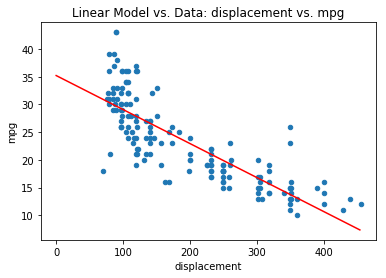

In [6]:
%matplotlib inline

linear_model = LinearRegression()
X = mpg_train[["displacement"]]

linear_model.fit(X, Y)
overlay_simple_linear_model(mpg_train, 'displacement', 'mpg', linear_model);

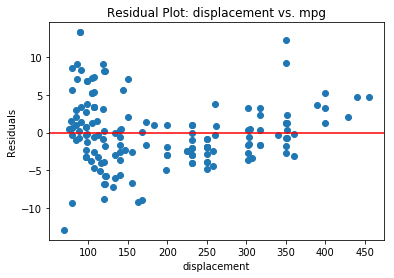

In [7]:
plot_simple_residuals(mpg_train, 'displacement', 'mpg', linear_model)

**Question**: What do you notice about the residual plot?

**Answer**: The residual plot shows us that we're overpredicting for the intermediate values for `displacement` and underpredicting for the higher values of `displacement`. This suggests that a different model may be better suited for this data, since our model is not accurately capturing the shape of our data. 

**So, how do we fix this?**

We introduce you the idea of **parametric fitting**. It is a process of constructing a curve, or mathematical function, that has the best fit to a series of data points. Linear regression is the most popular one out of this category, but there are more! We are going to introduce two major ones, data transformation and polynomial regression.

<a id='section3.2'></a>
## Data Transformation

One way to fix this error in a best fit line is to transform our explanatory variable! You might think that the shape of the scatterplot could be modeled better by a model of the form $y = a\log{x} + b$.  We can preliminarily test whether it would make sense to make such a model by looking at the scatterplot comparing `mpg` and `log(displacement)`.

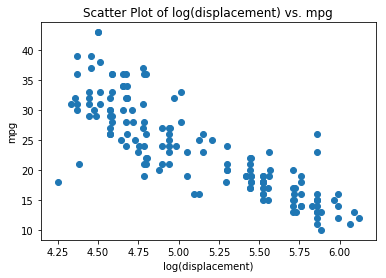

In [8]:


plt.scatter(np.log(mpg_train['displacement']), mpg_train['mpg'])
plt.title("Scatter Plot of log(displacement) vs. mpg")
plt.xlabel("log(displacement)")
plt.ylabel("mpg");

As we can see, transforming our data can allowed us to see a more linear relationship between $log(displacement)$ and $mpg$, so let's make a linear regression model based off of that! We can do this by transforming our $x$ into $\log{x}$ and then running linear regression in the same way we did before!

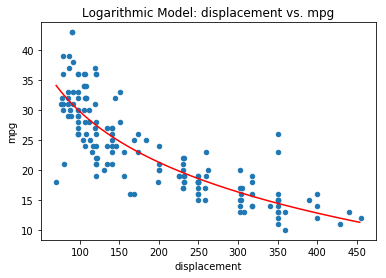

In [9]:
logarithmic_model = LinearRegression()
X = mpg_train[["displacement"]]

transformedX = np.log(X)
logarithmic_model.fit(transformedX, Y)

x = np.arange(min(X.values), max(X.values)).reshape((-1, 1))
transformedx = np.log(x)
predicted = logarithmic_model.predict(transformedx) # predicted values

mpg_train.plot.scatter("displacement", "mpg")
plt.plot(x, predicted, color='red')
plt.title("Logarithmic Model: displacement vs. mpg")
plt.show()

Let's take a look at the residuals for this new model. How does it look in comparison to the previous residual plot?

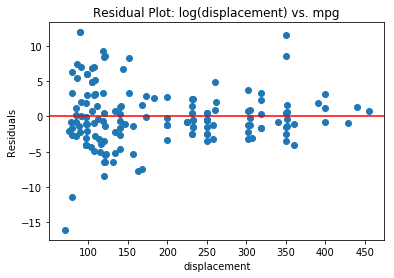

In [10]:
residuals = Y - logarithmic_model.predict(transformedX)

plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot: log(displacement) vs. mpg")
plt.xlabel("displacement")
plt.ylabel("Residuals")
plt.show()

<a id='section3.3'></a>
## Polynomial Regression
Alternatively, you might have thought the curve of the line reminded you of a **quadratic** function of the form $y = ax^2 + bx + c$. We can make a model of this form by simply doing multiple linear regression with our two explanatory variables as $x$ and $x^2$, which we can make by transforming $x$!

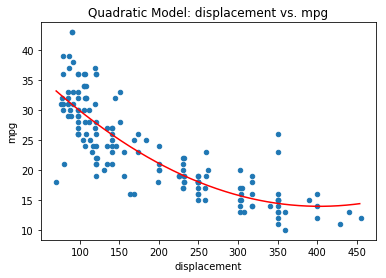

In [11]:
polynomial_model = LinearRegression()
X = mpg_train[["displacement"]]

X_squared = np.power(X, 2)
combinedX = np.hstack((X, X_squared)) # we're horizontally stacking X_squared, because we're adding columns
polynomial_model.fit(combinedX, Y)

x = np.arange(min(X.values), max(X.values)).reshape((-1, 1))
x_squared = np.power(x, 2)
combinedx = np.hstack((x, x_squared))
predicted = polynomial_model.predict(combinedx) # predicted values

mpg_train.plot.scatter("displacement", "mpg")
plt.plot(x, predicted, color='red') 
plt.title("Quadratic Model: displacement vs. mpg")
plt.show()

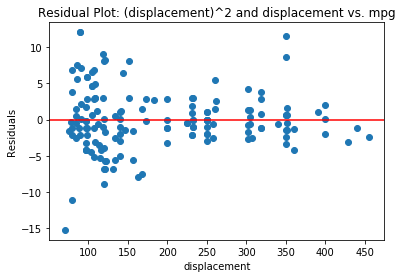

In [12]:
residuals = Y - polynomial_model.predict(combinedX)

plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot: (displacement)^2 and displacement vs. mpg")
plt.xlabel("displacement")
plt.ylabel("Residuals")
plt.show()

As we can see above, the residual plot shows points much more randomly scattered around the line $y=0$, and we don't see any patterns that don't resemble a random scatter in this plot. This model is clearly much better than the simple linear model, as depicted visually through seeing the 'fit' of the newer model on the dataset and through the random scatter in the residual plot.

**Exercise**: Why don't you choose some variables of your interest, one or two, and see how those variables influence mpg. Please use polynomial regression of degree more than or equal to 2, and plot the relationship between your explanatory variable and mpg. 

Raising the complexity of the model allowed us to better fit our data! But is that always the case? Let's explore.

<a id='section4'></a>
# Validation and Testing

<a id='section4.1'></a>
## Overfitting
So why stop at $y = ax^2 + bx + c$? Why not go even further and make a degree-15 polynomial model of the form $y = ax^{15} + bx^{14} + ... + c$?

In [11]:
def polynomial_stack(X, degrees):
    """
    This function creates a matrix in which each column k contains X^(k+1), e.g. column 0 has X and column 3 has X^4
    
    X(array): an array representing a single column of data
    degrees: the highest degree polynomial to return
    
    returns a np.array of shape (len(X), degrees)
    """
    return np.hstack((np.power(X, i+1) for i in range(degrees)))
    
def polynomial_regression(data, x_name, y_name, degrees):
    """
    This function plots a polynomial regression model overlaid on a scatterplot of the original data.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    degrees(int): the degree of the polynomial to fit the model on
    
    returns the polynomial regression model
    """
    X = data[[x_name]]
    Y = data[[y_name]]
    X, Y = X/1000., Y
    poly = LinearRegression()
    X_stack = polynomial_stack(X, degrees)
    poly.fit(X_stack, Y)

    x = np.arange(min(X.values), max(X.values)+.001, .001).reshape((-1, 1))
    x_stack = polynomial_stack(x, degrees)
    predicted = poly.predict(x_stack)

    data.plot.scatter(x_name, y_name)
    plt.plot(1000*x, predicted, color='red')
    plt.title("Polynomial Degree " + str(degrees) + " Model: " + x_name + " vs. " + y_name)
    plt.show()
    return poly

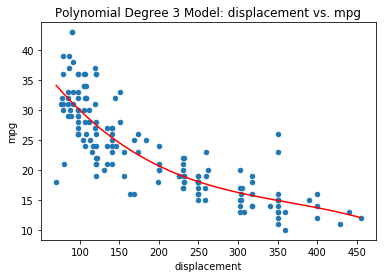

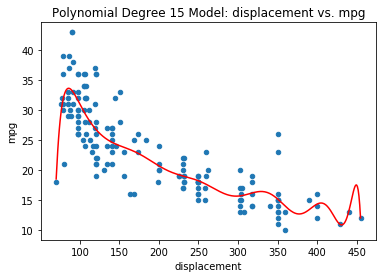

In [12]:
poly_3 = polynomial_regression(mpg_train, "displacement", "mpg", 3)
poly_15 = polynomial_regression(mpg_train, "displacement", "mpg", 15)

As we can see, we cover many more points than we did before with the simple linear regression (x vs y plot). It seems with increasingly complexity, our model is more and more accurate. **So why not keep doing this and make more and more complex regression lines (best-fit lines)?** 

We refrain from making more and more complex regression lines because these lines are not only used to fit the sample we fit the model on, but we want to use it as a general descriptor of the relationship between these variables. If we wanted to use it to **predict** future points, it wouldn't work that well for most values. Looking at our last model, do you think it accurately describes the `mpg` of a car with `displacement = 75`?

We can imagine how this kind of discrepancy might be the cause for error in other datasets when we try to get a line of best fit, as in those cases, we may not always know what is nonsensical output. 

For example, the dataset may not have as clear features as `displacement` and `mpg`, and as a result, you might not be able to determine when you've predicted an output that doesn't make any sense in the context of the data. Or maybe you won't be able to visualize it as easily as we can with only one explanatory variable.

This kind of situation is what we would call **overfitting** our model on our training data. Even though we can make a model fit perfectly on our training data, it doesn't generalize well with other data points, as a model is supposed to show a **generalization of reality**. The more complex model we used to fit our model this time isn't necessarily reflective of what we see happens in real world phenomenon.


### Overfitting Demo
Now, let's take a look at what overfitting looks like when looking at varying degrees of models on the same data points!

/Users/rxy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/rxy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


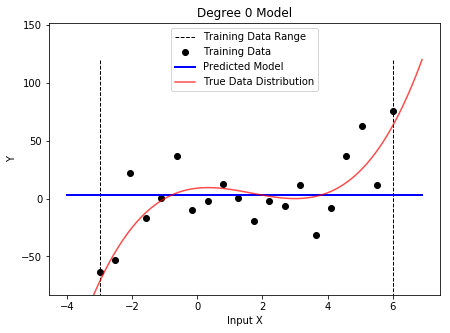

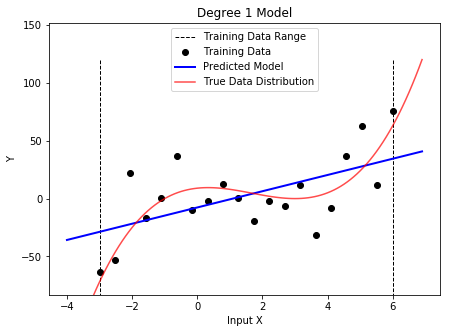

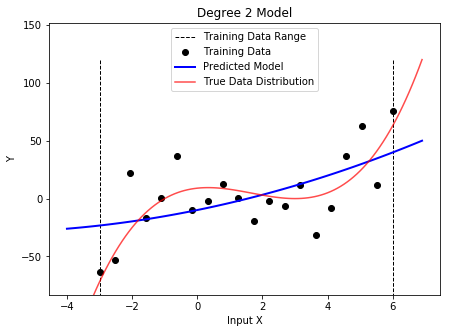

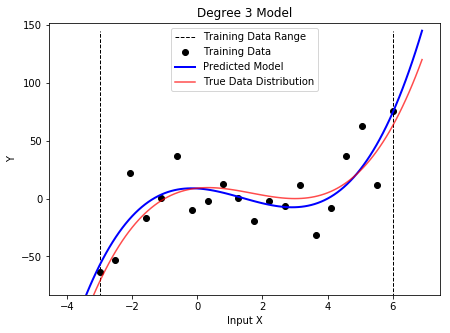

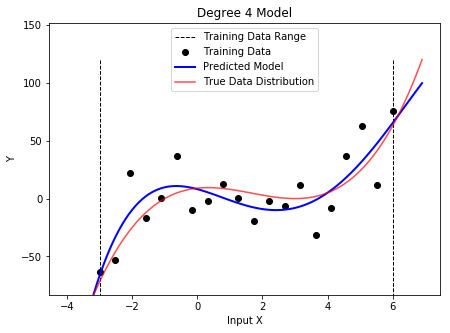

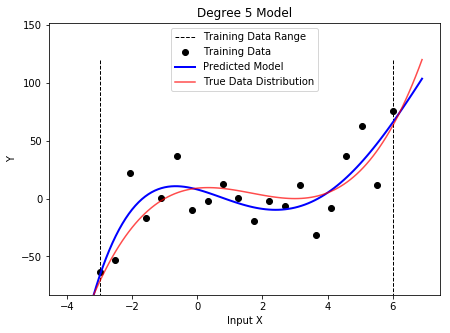

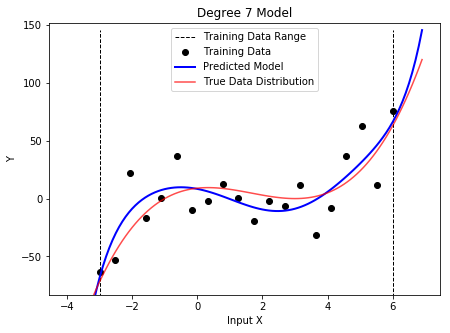

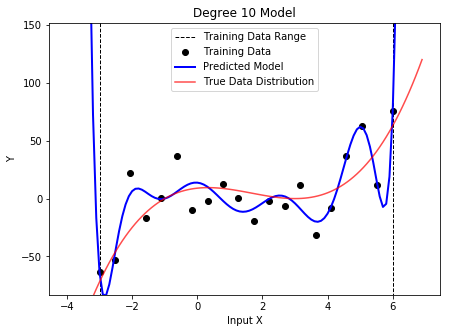

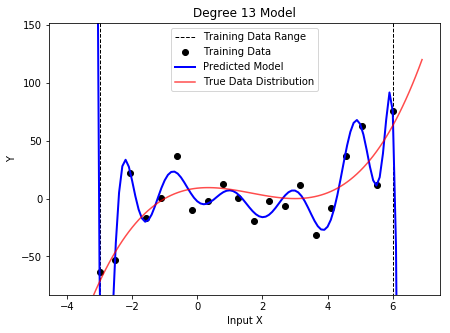

In [13]:
overfittingDemo()

As we can see from above, as we our model's degree beyond a degree 3 model, our predicted model becomes more and more erratic, which isn't necessarily how the true data is distributed.

Now that we know lines of best fit can underfit and overfit our data, we may think we're in a bit of a predicament! **How can we determine what line of best fit best fits our data and generalizes the best with the world?**

The answer is, it's completely relative to your data set! There's no magic number for the maximum degree polynomial you can have when plotting your line of best-fit (though there can be extremes) and the same for the mimumum. However, a general trend for fitting follows something simliar to this chart:

<img src='trueError.png' width="400" height="400">

As we increase in the model order (the max degree polynomial we use as a best fit line for our data), we see that the true error for our graph dips at a certain point, but continuously increases over time after that. What we're trying to do is determine a best-fit line that hovers as close as possible to the point of lowest true error.

**But what's a good strategy to find that?**

Something we call **Validation**!

<a id='section4.2'></a>
## Validation

So far we've talked a lot about what underfitting and overfitting are, and how to visually detect whether or not your model is doing one or the other. However, we haven't gone into any strategies into how we can achieve some kind of happy medium between underfitting and overfitting, so our model fits well against **the underlying distribution of our data** and also **generalizes well against other data points**.

Well, what if, in order to determine whether or not our model generalizes well against other data points, we **validated** how well our model was doing against some data points, and also **tested** our model against other data points to see how it would compare to other final models?

Now that might be a bit confusing to grasp at first, so we're going to break it down!

#### In order to verify how well our model is doing, we can split our initial data set that we're given into three different groups:
* **Training set:** The set of data points you use to fit your model.
* **Validation set:** The set of data points that you use to fine tune your model's parameters (aka "fine tuning your model's hyperparameters")
    * Hyperparameters are essentially the parameters your model uses, which in our case are the coefficients of our polynomial as well as how high of a degree polynomial would be best to use
* **Test set:** The set of data points that you use to evaluate how well your model that was fit against your training set does against other "outside" data points

You may find that the terms **validation set** and **test set** are sometimes used interchangably in outside works concerning testing how accurate your model is, but we'll be using the formal definitions and uses of all 3 of the sets listed above.

So, instead of getting new data points to test our model against, we just split our initial data set into three groups- typically done in a 60/20/20 split ($60\%$ of data to training, $20\%$ to validation, and $20\%$ to testing). Here's a little visual of what we're trying to convey:

<img src="train-validate-test.png" width=400 height=400>

We're essentially just splitting up our dataset into 3 distinct datasets for future usage.

Once this splitting is done, we're able to follow the following steps through a process of validating the best model for your dataset.
1. Initially fit a model against our **training set**.
2. Use the **validation set** to provide information on which hyperparameters might be best tailored for your model (in our case, which coefficients and which degree polynomial might be the best to use) by repeatedly testing different models against this dataset. At the end, choose whichever hyperparameters for your model that are the most favorable for you (in our case, the most favorable hyperparamters are the ones that reduce as much loss as possible, but this won't necessarily always be the case).
3. Take the favorable model from step 2 and test the model against our **test set**. The result will be an unbiased indicator of how well our model does with "generalizing against other data points".

**Question:** Why do we conduct this entire process, and not just repeated test different models against our test set until we get the lowest error possible?

The reason we don't continuously test against our test set is because that would not only result in a biased evaluation of how well our model is doing, but also because our models would be able to **overfit** by repeatedly trying to lower our error from testing it on our test set. We want to prevent our model from **overfitting** on any data set, including the test set, as the test set is just something we made to conduct tests from our original data. 

There are limitless possibilities to what our test set could've been like, and so, there can be enough unpredicability within our test set that other test sets we could've made could produce totally different results. So, we try to refrain from testing repeatedly on the test set, and rather just test our final model on the test set to have a final verification on how well it's able to predict and generalize to other data points.

This method of validation, where you initially split your data into a 60/20/20 split and use one of the $20\%$ groups to tune your hyperparameters against is just one of many methods out there. Some other methods of validation include [k-fold cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29) and [regularization](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29). We won't go in detail into these here, but in case you were curious about them, click on them to learn more!

For now, let's do a demo with this on the data we've been using from the `mpg` dataset!


In [14]:
from sklearn.metrics import mean_squared_error
X_validation = mpg_validation[["displacement"]]
Y_validation = mpg_validation[["mpg"]]
X_validation_stack_3 = polynomial_stack(X_validation/1000, 3)
pred_3 = poly_3.predict(X_validation_stack_3)
print("Degree 3 Polynomial validation error: " + str(mean_squared_error(Y_validation, pred_3)))

X_validation_stack_15 = polynomial_stack(X_validation/1000, 15)
pred_15 = poly_15.predict(X_validation_stack_15)
print("Degree 15 Polynomial validation error: " + str(mean_squared_error(Y_validation, pred_15)))

Degree 3 Polynomial validation error: 20.77343714407986
Degree 15 Polynomial validation error: 21.1746768576389


It seems like the degree 3 polynomial has lower error based on our validation set, so we will pick that as our final model of the two and evaluate it on our test set!

In [15]:
X_test = mpg_test[["displacement"]]
Y_test = mpg_test[["mpg"]]
X_test_stack_3 = polynomial_stack(X_test/1000, 3)
pred_3 = poly_3.predict(X_test_stack_3)
print("Degree 3 Polynomial test error: " + str(mean_squared_error(Y_test, pred_3)))

Degree 3 Polynomial test error: 16.2393381297196


<a id='section4.3'></a>
## Training/Test Error

As we can see, training a model, validating which hyperparameters are the best suited for our model, and then finally testing it to see it's final accuracy are all steps we can follow to create a model that no longer **underfits** or **overfits** on our data. But how do we measure the performance of our model. We need some metrics. Now above you might see that there's tidbits about **training error** and **test error**. What are those?

* **Training error:** The error returned from running an **error function** on your model with your training set. In most case, we determine the MSE (mean squared error) from the data points in our training set to our model.
* **Test error:** The error returned from running an error function on your fine-tuned post-validation model with your test set. In most case, we still use the MSE to determine how accurate our model is doing against data points in our test set.


Now, these numerical values for **training error** and **test error** can also be measurements through which we can determine how well our model is doing on our data points. You can imagine that if we wanted to lower our training error, we'd want to better fit a model against our training points. Previously, residual is one kind of error that we look at to visualize how good our model is performing.

However, as we talked about before, the more we try to fit a model against a dataset, the more likely we are to **overfit**. So, minimizing our **training error** isn't necessarily what we're typically trying to achieve. A good visualization that conveys what we're talking about is shown below:

<img src='training_vs_test_error.png' width="800" height="800">

As we increase in the model order (the max degree polynomial we use as a best fit line for our data), we can see that we lower our **training error**, which can be good in the beginning. We see that our test error is also minimized up until our model reaches degree 3 or so. However, as we continue to lower our **training error**, we see that our **test error** continues to increase. Now, we can see that we're beginning to **overfit** on our training data, and **not generalizing well** against other data points (in this case, our test set).

**In conclusion**, we can see that validation can be an incredibly useful process through which we create a model that fits, but doesn't overfit or underfit, on our data. We also see that different measurable quantities, such as training error and test error, can also be indicative of how well our model is doing at different periods of time, and see how well it's fitting against our data.

<a id='section5'></a>
# Loss Functions

<a id='section5.1'></a>
## Loss Function

**Loss functions**, sometimes also known as cost functions, represents the error associated with our trainning. Loss function is also almost the same as **error function** we mentioned above. It essentially quantifies how well our model is doing. Lower loss generally corresponds with better performance. 

you can think of machine learning's goal as minimizing a loss function. In most of the "fit" commands you type above, we are minimizing MSE, known as the Mean Squared Error. Basically, it is finding the weights on your X variables so that the Mean Squared Error is minimized. There are also more types that deal with different questions and are suitable for different purposes. 
<img src='loss_functions.png' width=400, height=400>
image from https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

* **Mean Squared Loss:** The error output from finding the average of all the squared magnitudes from all the predicted and actual outputs. To get a better idea of what **MSE** is, take a look at the following picture:
<img src='mean_squared_error.png' width=400, height=400>

* **Mean Absolute Loss:** The error output from finding the average of all the absolute difference from all the predicted and actual outputs. This is another type of error "function" we use to calculate training and test errors. 


* **Ridge Loss:** Ridge Regressions adds an extra term to MSE loss and makes sure that model weight is as small as possible. At the same time, it ensures that the model is not overfitting. Remember the regulization term should only be used during the training session but not in the testing session. $\alpha$ is a hyperparamter associated with ridge loss that we can adjust.
## $$ J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum^n_{i=1}\theta_i^2$$

* **Lasso Loss:**  Lasso Regressions adds an extra term to MSE loss and makes sure that model weight are more sparse, meaning having more zeros, which makes computation faster. Remember the regulization term should also only be used during the training session but not in the testing session. $\alpha$ is a hyperparamter associated with lasso loss that we can adjust.
## $$ J(\theta) = MSE(\theta) + \alpha\sum^n_{i=1}|\theta_i|$$

* **Huber loss:** One kind of error that is less sensitive to outliers in data than the squared error loss. We are not going to explain this in fully detail, but this loss is difficult to differentiate by hand.


<a id='section5.2'></a>
## Gradient Descent

As introduced in linear algebra section, where $X$ is your matrix of input observations and $y$ your output vector, we can solve the optimization question as $\theta = (X^TX)^{-1}X^Ty$. The problem with this operation is the time complexity of calculating the inverse of a $n\times n$ matrix which is $O(n^3)$ and as n increases it can take a very long time to finish. When we use a neural network, the direct parameter optimization formula is really hard to get, that is why we introduce the idea of Gradient Descent.

### Intuition

Gradient descent solves our above problem by iteratively moving in the direction of steepest descent towards local minimal. The descent direction is as specified by the negative of the gradient and the degree is determined by hyperparemeter named stepsize. 

The intuition behind gradient descent is, as we are trying tominimize the value of our loss function, we will be changing the weights $\theta$ gradually. As we said, since we can't derive a  perfect solving form, we start by picking a $\theta$ anywhere we'd like. Then, we can iteratively improve the estimate of $\theta$. To improve an estimate of $\theta$, we look at the slope of the loss function at that choice of $ \theta $, which is negative in the picture below. Then, we take one step down towards the optimized value by increasing $ \theta $. 
<img src='GD2.png' width=400, height=400>
image from http://www.ds100.org/, lecture also adapt from data100's way of teaching gradient descent.

### Mathematics

This is the full algorithm for gradient descent:

1. Choose a starting value of $ \theta $ (0 is a common choice).
2. Compute the gradient: $\frac{\partial}{\partial \theta} L(\theta, \textbf{y}) $
2. Update this as the new value of $ \theta  =  \theta - \alpha \cdot \frac{\partial}{\partial \theta} L(\theta, \textbf{y}) $
3. Repeat until $ \theta $ is stable, which means when the loss is not changing too much



Let's also calculate the loss for MSE together for once:

$$
\begin{aligned}
L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2\\
\frac{\partial}{\partial \theta} L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n} -2(y_i - \theta) \\
&= -\frac{2}{n} \sum_{i = 1}^{n} (y_i - \theta) \\
\end{aligned}
$$

<a id='section5.3'></a>
## Hyperparameter
As we can see above, there is an $\alpha$ term. We cal this term the learning rate. It is one of the most important hyperparameters for training. What is a hyperparameter in general?
- Define model complexity, how capable the model can learned and how fast the model can learn
    - For example, what degree of polynomial we are going to use
- Hyperparameter is predefined but not trained, on the contrary, parameter is trained
    - What is the learning rate?
    - What is the ridge regression coefficients?
- We use validation set to choose different values of hyperparameter
    - Even the size of test/train/validation set is hyperparamter

**Question:** What is the difference between a hyperparameter and parameter?

<a id='section5'></a>
# Classfication

Classfication is the type of task that we use to map the input data to a specific category. It is actually one of the most usual task we have in life. For example, you want to recognize what an animal is or what an image is, they all use classfication. More standard tasks for machine learning include diagnosing if a patient has cancer.

<img src='classification.jpeg' width=600, height=400>
image from https://medium.freecodecamp.org/chihuahua-or-muffin-my-search-for-the-best-computer-vision-api-cbda4d6b425d

Classfication task is different from regression task in different perspectives, here are a few!

## Data Representation
The y is now classes, instead of a numerical value. How should we represent that?

- One way is giving each category one numerical value from 0 to N, given we have N categories
- The other way is using one hot vector
<img src='onehot.png' width=400, height=400>
image from https://naadispeaks.wordpress.com/2018/04/09/one-hot-encoding-in-practice/

In [6]:
mpg = pd.read_csv("./mpg_category.csv", index_col="name") # load mpg dataset
mpg.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,OilExpensive,Old?
name,,,,,,,,
chevrolet chevelle malibu,8,307,130,3504,12,1,inexpensive,old
buick skylark 320,8,350,165,3693,11,1,inexpensive,old
plymouth satellite,8,318,150,3436,11,1,inexpensive,old
amc rebel sst,8,304,150,3433,12,1,inexpensive,old
ford torino,8,302,140,3449,10,1,inexpensive,old


In [7]:
mpg['OilExpensive'] = [1 if i=='expensive' else 0 for i in mpg['OilExpensive'].values] #represent mpg > 25 as 1 and 0 otherwise
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,OilExpensive,Old?
name,,,,,,,,
toyota corolla,4,108,70,2245,16,3,1,new
buick century,6,231,110,3907,21,1,0,old
cadillac eldorado,8,350,125,3900,17,1,0,new
bmw 320i,4,121,110,2600,12,2,0,new
ford fairmont futura,4,140,92,2865,16,1,0,new


## Models and Loss Function
Regression does not work at all here. The loss function using MSE also seems unfair here. What are some models and loss functions we can use?
- Models: random forest, k nearest neighbour, support vector machine, **logistic regression**, neural network
- Loss function: logistic loss, KL divergence, **softmax and cross-entropy**


In [8]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=2)
X = mpg_train[["displacement", "acceleration"]]
Y = mpg_train[["OilExpensive"]].values.ravel()#reshape(len(mpg_train),)
softmax_reg.fit(X,Y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Visualization
We want to visualize how many of them we have correctly predict, what we can use to visualize is known the confusion matrix. Each row of the matrix represents what we predict while each column represents what this actually is. It basically represents how two classes are confused after trainning 


In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_test = mpg_test[["displacement", "acceleration"]]
Y_test = mpg_test[["OilExpensive"]]
pred = softmax_reg.predict(X_test)
print(confusion_matrix(Y_test, pred))

[[40  9]
 [ 1 29]]


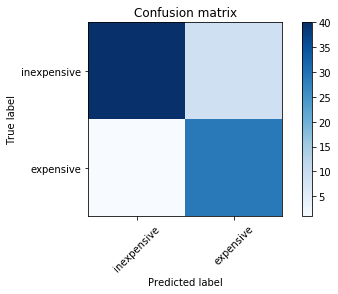

In [10]:
X_label = ['inexpensive', 'expensive']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, X_label, rotation=45)
    plt.yticks(tick_marks, X_label,)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(confusion_matrix(mpg_test[["OilExpensive"]], pred))

**Exercise**: Do you want to explore more about the data set? Now we will examine the relationship between the weight and if the car is old.
1. Can you make change the mpg data set lable for "Old?" , so that if the car is old, its "old?" value is 0. If it's reasonable, its "Old?" value is 1. Otherwise 2?

In [21]:
mpg['Old?'] = ... 

2. Can you split the dataset into training and testing?

In [22]:
mpg_train, mpg_test = ..., ...

3. Now fit your data.

In [24]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=...)
X = ...
Y = ...
softmax_reg.fit(X, Y)

**Question**: Can you think of how hyperparameters might matter in classification tasks?